# Optimization for Logistic Regression
Source Code: [logistic-regression.py](https://github.com/KatieMacalintal/KatieMacalintal.github.io/blob/main/posts/optimization/logistic_regression.py)

In this blog post, we use logistic regression and gradient descent to efficiently find a hyperplane that can separate a binary classified data set with minimal loss, in other words minimize the empircal risk. 

## Implementation

In our `LogisticRegression` class, we implemented a `fit` and `fit_stochastic` function that both take the data set `X` and their expected labels `y`.  

In the `fit` function, we are looking for the weights `w` (which includes the bias term) such that it mimimizes our loss. In order to find this `w`, we use the gradient descent framework, which searches for this local minima. 
In this framework, we compute the gradient of our loss function: $$\ell(\hat{y}, y)=-y\log\sigma(\hat{y})-(1-y)\log(1-\sigma(\hat{y})),$$ where $\sigma$ is the logistic sigmoid function and $\hat{y}$ is our prediction $\langle w,x_i \rangle$. 
This loss function, known as the logistic loss function, is convient for us because it is strictly convex in it's first argument meaning that our loss can have at most one minimum. 
The gradient of this loss function turns out to be: $$\nabla L(w)=(1/n)\sum_{i=1}^n (\sigma(\hat{y_i})-y_i)x_i.$$ This gradient equation is implemented in the `gradient` function of the code like `np.mean(((self.sigmoid(y_) - y)[:,np.newaxis]) * X, axis = 0)`. 
Then, as stated in Theorem 2 of [Optimization with Gradient Descent](https://middlebury-csci-0451.github.io/CSCI-0451/lecture-notes/gradient-descent.html) notes, because our gradent is a descent direction, we adjust our `w` by stepping in the direction of descent since we are looking for a `w` such that our loss is at the lowest it can be. 
We do this until we either reach the specified `max_epochs` or convergence. 
In this case, convergence is until the improvement in the our loss function is small enough in magnitiude.

The `fit_stochastic` function is very similar to the fit function, expect this time we don't compute the complete gradient, we instead compute the gradient on a batch size. In this function, we also can use momentum, which takes into account our previously taken step and allows us to continue moving along that direction if the update was good. 

## Experiments and Findings
Before we conduct any experiments, we need to import and define relevant extensions, classes, and functions.

In [54]:
from logistic_regression import LogisticRegression # source code
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np
np.seterr(all='ignore') 

def draw_graphs():
    fig, axarr = plt.subplots(1, 2)

    axarr[0].scatter(X[:,0], X[:,1], c = y)
    axarr[0].set(xlabel = "Feature 1", ylabel = "Feature 2", title = f"Loss = {LR.loss_history[-1]}")

    f1 = np.linspace(-3, 3, 101)

    p = axarr[0].plot(f1, (- LR.w[2] - f1*LR.w[0])/LR.w[1], color = "black")

    axarr[1].plot(LR.loss_history)
    axarr[1].set(xlabel = "Iteration number", ylabel = "Empirical Risk")
    plt.tight_layout()

### Gradient Descent and Stochastic Gradient Descent

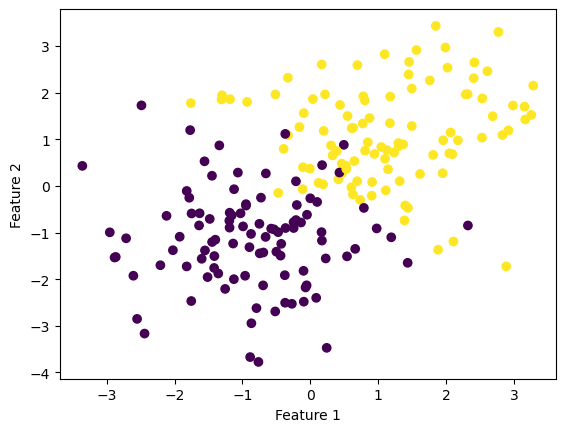

In [21]:
# Make the data
p_features = 3
X, y = make_blobs(n_samples = 200, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

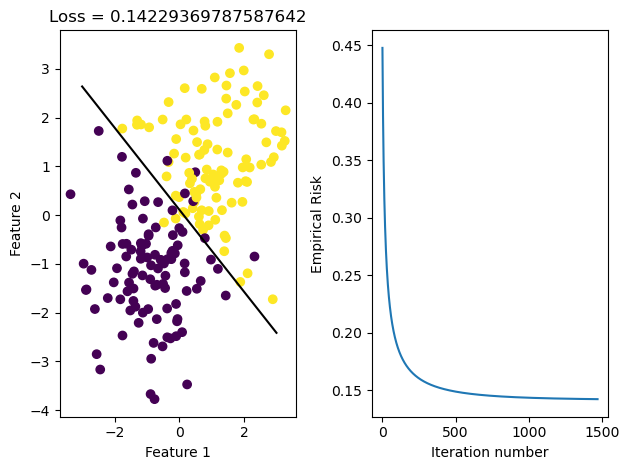

In [51]:
# Fit the model
LR = LogisticRegression()
LR.fit(X, y, alpha = 0.1, max_epochs = 10000)

fig, axarr = plt.subplots(1, 2)

axarr[0].scatter(X[:,0], X[:,1], c = y)
axarr[0].set(xlabel = "Feature 1", ylabel = "Feature 2", title = f"Loss = {LR.loss_history[-1]}")

f1 = np.linspace(-3, 3, 101)

p = axarr[0].plot(f1, (- LR.w[2] - f1*LR.w[0])/LR.w[1], color = "black")

axarr[1].plot(LR.loss_history)
axarr[1].set(xlabel = "Iteration number", ylabel = "Empirical Risk")
plt.tight_layout()

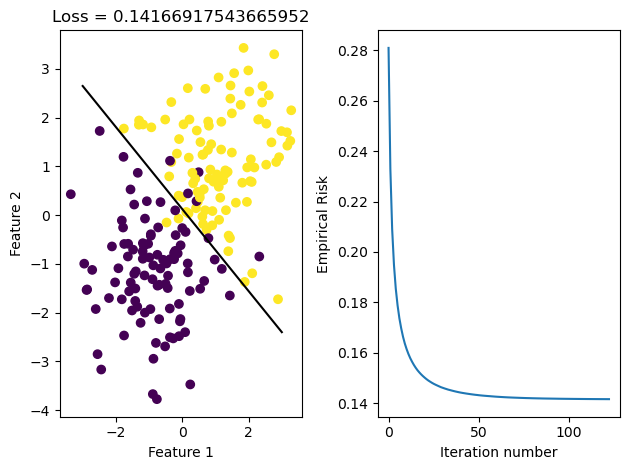

In [52]:
# Fit the model
LR = LogisticRegression()
LR.fit_stochastic(X, y, alpha = 0.1, max_epochs = 10000, batch_size = 10)

fig, axarr = plt.subplots(1, 2)

axarr[0].scatter(X[:,0], X[:,1], c = y)
axarr[0].set(xlabel = "Feature 1", ylabel = "Feature 2", title = f"Loss = {LR.loss_history[-1]}")

f1 = np.linspace(-3, 3, 101)

p = axarr[0].plot(f1, (- LR.w[2] - f1*LR.w[0])/LR.w[1], color = "black")

axarr[1].plot(LR.loss_history)
axarr[1].set(xlabel = "Iteration number", ylabel = "Empirical Risk")
plt.tight_layout()

We see that they both reach the same loss, but the stochastic gradient descent reaches it fewer iterations, meaning it iterated over all data points less times. This may be because it makes updates to w more frequently than regular gradient descent does, since it samples its w on portions of data set X and updates as it goes. 

## Learning Rate $\alpha$

It's important that the learning rate $\alpha$ is relatively small. Before we set our alpha to , but if we use the same data and set it to a too high number we see that we never converge in both regular gradient descent and stochastic gradient descent. If it's too large, we might be updating `w` by too much that it eventually skips the minimum. 

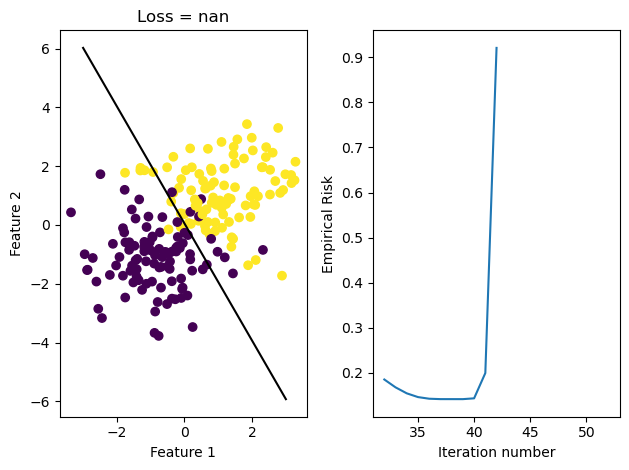

In [34]:
# Fit the model
LR = LogisticRegression()
LR.fit(X, y, alpha = 100, max_epochs = 1000)

fig, axarr = plt.subplots(1, 2)

axarr[0].scatter(X[:,0], X[:,1], c = y)
axarr[0].set(xlabel = "Feature 1", ylabel = "Feature 2", title = f"Loss = {LR.loss_history[-1]}")

f1 = np.linspace(-3, 3, 101)

p = axarr[0].plot(f1, (- LR.w[2] - f1*LR.w[0])/LR.w[1], color = "black")

axarr[1].plot(LR.loss_history)
axarr[1].set(xlabel = "Iteration number", ylabel = "Empirical Risk")
plt.tight_layout()

As you see above, in the regular gradient descent, we can tell that we stepped over our minimum as our loss increases to around 0.9 on our last iteration. 

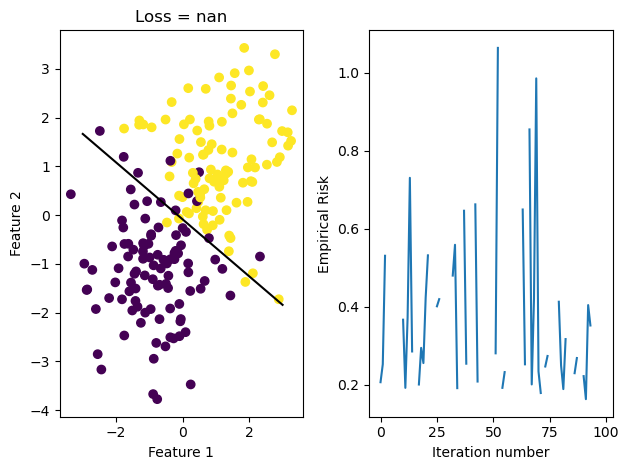

In [53]:
LR.fit_stochastic(X, y, alpha = 20, max_epochs = 100)

# inspect the fitted value of w
LR.w 

fig, axarr = plt.subplots(1, 2)

axarr[0].scatter(X[:,0], X[:,1], c = y)
axarr[0].set(xlabel = "Feature 1", ylabel = "Feature 2", title = f"Loss = {LR.loss_history[-1]}")

f1 = np.linspace(-3, 3, 101)

p = axarr[0].plot(f1, (- LR.w[2] - f1*LR.w[0])/LR.w[1], color = "black")

axarr[1].plot(LR.loss_history)
axarr[1].set(xlabel = "Iteration number", ylabel = "Empirical Risk")
plt.tight_layout()

As you see above, in the stochastic gradient descent, we can tell that our loss is fluctuating a lot. WHAT DOES THIS MEAN? 

## Stochastic Gradient Descent: Batch Size

In [96]:
# Make the data
p_features = 11
X, y = make_blobs(n_samples = 1000, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

# fig = plt.scatter(X[:,0], X[:,1], c = y)
# xlab = plt.xlabel("Feature 1")
# ylab = plt.ylabel("Feature 2")

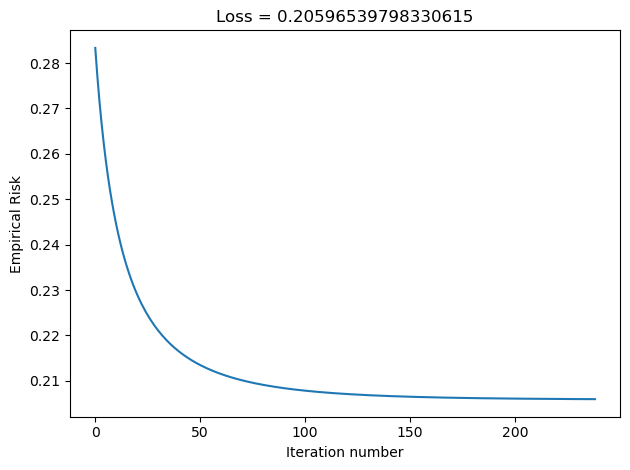

In [97]:
LR.fit_stochastic(X, y, alpha = 0.1, max_epochs = 10000, batch_size = 500)

# inspect the fitted value of w
LR.w 

fig, axarr = plt.subplots(1, 1)

# axarr[0].scatter(X[:,0], X[:,1], c = y)
# axarr[0].set(xlabel = "Feature 1", ylabel = "Feature 2", title = f"Loss = {LR.loss_history[-1]}")

# f1 = np.linspace(-3, 3, 101)

# p = axarr[0].plot(f1, (- LR.w[2] - f1*LR.w[0])/LR.w[1], color = "black")

axarr.plot(LR.loss_history)
axarr.set(xlabel = "Iteration number", ylabel = "Empirical Risk", title = f"Loss = {LR.loss_history[-1]}")
plt.tight_layout()

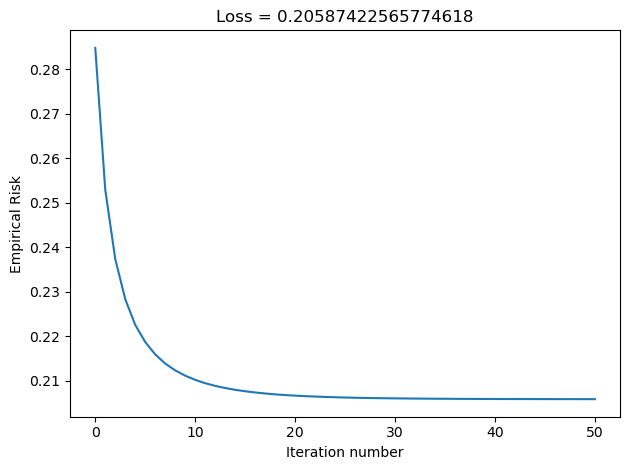

In [98]:
LR.fit_stochastic(X, y, alpha = 0.1, max_epochs = 10000, batch_size = 50)

# inspect the fitted value of w
LR.w 

fig, axarr = plt.subplots(1, 1)

# axarr[0].scatter(X[:,0], X[:,1], c = y)
# axarr[0].set(xlabel = "Feature 1", ylabel = "Feature 2", title = f"Loss = {LR.loss_history[-1]}")

# f1 = np.linspace(-3, 3, 101)

# p = axarr[0].plot(f1, (- LR.w[2] - f1*LR.w[0])/LR.w[1], color = "black")

axarr.plot(LR.loss_history)
axarr.set(xlabel = "Iteration number", ylabel = "Empirical Risk", title = f"Loss = {LR.loss_history[-1]}")
plt.tight_layout()

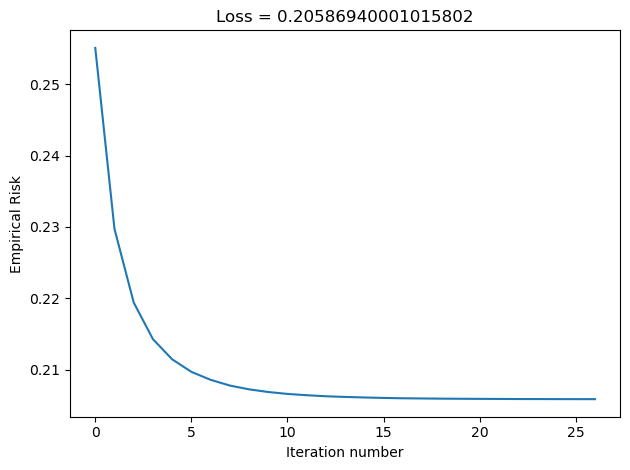

In [102]:
LR.fit_stochastic(X, y, alpha = 0.1, max_epochs = 10000, batch_size = 25)

# inspect the fitted value of w
LR.w 

fig, axarr = plt.subplots(1, 1)

# axarr[0].scatter(X[:,0], X[:,1], c = y)
# axarr[0].set(xlabel = "Feature 1", ylabel = "Feature 2", title = f"Loss = {LR.loss_history[-1]}")

# f1 = np.linspace(-3, 3, 101)

# p = axarr[0].plot(f1, (- LR.w[2] - f1*LR.w[0])/LR.w[1], color = "black")

axarr.plot(LR.loss_history)
axarr.set(xlabel = "Iteration number", ylabel = "Empirical Risk", title = f"Loss = {LR.loss_history[-1]}")
plt.tight_layout()

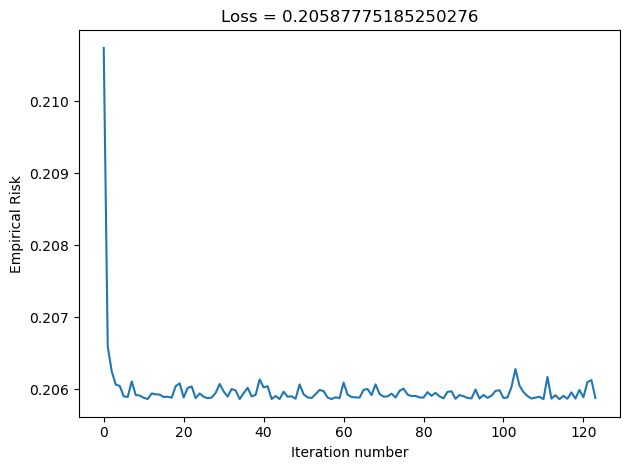

In [101]:
LR.fit_stochastic(X, y, alpha = 0.1, max_epochs = 10000, batch_size = 5)

# inspect the fitted value of w
LR.w 

fig, axarr = plt.subplots(1, 1)

# axarr[0].scatter(X[:,0], X[:,1], c = y)
# axarr[0].set(xlabel = "Feature 1", ylabel = "Feature 2", title = f"Loss = {LR.loss_history[-1]}")

# f1 = np.linspace(-3, 3, 101)

# p = axarr[0].plot(f1, (- LR.w[2] - f1*LR.w[0])/LR.w[1], color = "black")

axarr.plot(LR.loss_history)
axarr.set(xlabel = "Iteration number", ylabel = "Empirical Risk", title = f"Loss = {LR.loss_history[-1]}")
plt.tight_layout()

We see that as our batch size gets smaller, our number of iterations over the all data points in X also gets smaller. This relates to why stochastic gradient descent uses fewer iterations as gradient descent. As our batch size gets larger, we do not updates w as frequently as we would have if it were smaller. 

In the Disenroth, Faisal, and Soon reading, they state ... 
"Large mini-batch sizes will provide accurate estimates of the gradient, reducing the variance in the parameter update. Furthermore, large mini batches take advantage of highly optimized matrix operatons in vectorized implementations of the cost and gradient. The reduction in variance leads to more stable convergence, but each graident calculation will be more expensive."
"small mini-batches are quick to estimate. If we keep the mini-batch size small, the noise in our graident estimate will allow us to get out of some bad local optima" 
"since the goal in machine learning does not necessarily need a precise estimate of the minimum of the objective function, approximate gradients using mini-batch approaches have been widely used."

## Momentum

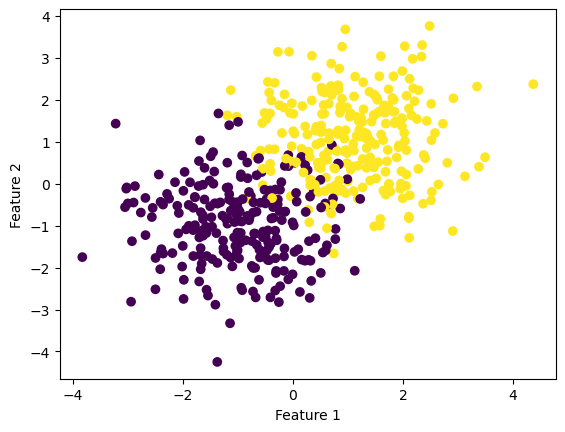

In [103]:
# Make the data
p_features = 3
X, y = make_blobs(n_samples = 500, n_features = p_features - 1, centers = [(-1, -1), (1, 1)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

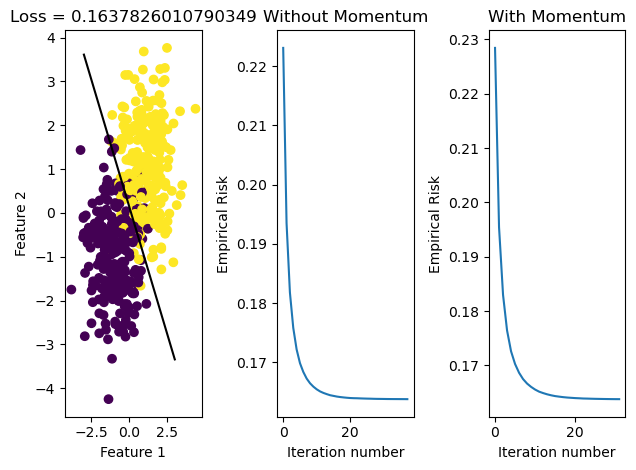

In [109]:
LR.fit_stochastic(X, y, alpha = 0.1, max_epochs = 10000, batch_size = 10, momentum = False)

# inspect the fitted value of w
LR.w 

fig, axarr = plt.subplots(1, 3)

axarr[0].scatter(X[:,0], X[:,1], c = y)
axarr[0].set(xlabel = "Feature 1", ylabel = "Feature 2", title = f"Loss = {LR.loss_history[-1]}")

f1 = np.linspace(-3, 3, 101)

p = axarr[0].plot(f1, (- LR.w[2] - f1*LR.w[0])/LR.w[1], color = "black")

axarr[1].plot(LR.loss_history)
axarr[1].set(xlabel = "Iteration number", ylabel = "Empirical Risk", title = "Without Momentum")

LR.fit_stochastic(X, y, alpha = 0.1, max_epochs = 10000, batch_size = 10, momentum = True)
axarr[2].plot(LR.loss_history)
axarr[2].set(xlabel = "Iteration number", ylabel = "Empirical Risk", title = "With Momentum")
plt.tight_layout()

Difficult to tell that momentum makes a difference here. 

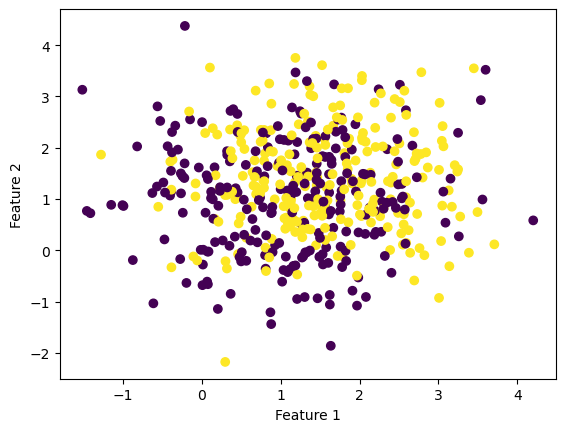

In [110]:
# Make the data
p_features = 3
X, y = make_blobs(n_samples = 500, n_features = p_features - 1, centers = [(1, 1), (1.5, 1.5)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

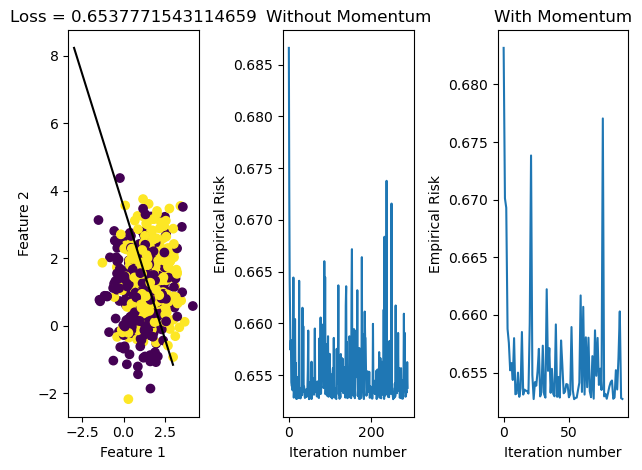

In [111]:
LR.fit_stochastic(X, y, alpha = 0.1, max_epochs = 10000, batch_size = 10, momentum = False)

# inspect the fitted value of w
LR.w 

fig, axarr = plt.subplots(1, 3)

axarr[0].scatter(X[:,0], X[:,1], c = y)
axarr[0].set(xlabel = "Feature 1", ylabel = "Feature 2", title = f"Loss = {LR.loss_history[-1]}")

f1 = np.linspace(-3, 3, 101)

p = axarr[0].plot(f1, (- LR.w[2] - f1*LR.w[0])/LR.w[1], color = "black")

axarr[1].plot(LR.loss_history)
axarr[1].set(xlabel = "Iteration number", ylabel = "Empirical Risk", title = "Without Momentum")

LR.fit_stochastic(X, y, alpha = 0.1, max_epochs = 10000, batch_size = 10, momentum = True)
axarr[2].plot(LR.loss_history)
axarr[2].set(xlabel = "Iteration number", ylabel = "Empirical Risk", title = "With Momentum")
plt.tight_layout()

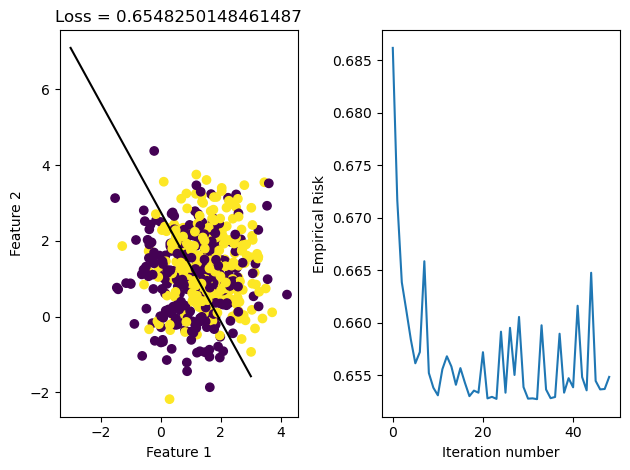

In [116]:
LR.fit_stochastic(X, y, alpha = 0.1, max_epochs = 10000, batch_size = 10, momentum = False)

# inspect the fitted value of w
LR.w 

fig, axarr = plt.subplots(1, 2)

axarr[0].scatter(X[:,0], X[:,1], c = y)
axarr[0].set(xlabel = "Feature 1", ylabel = "Feature 2", title = f"Loss = {LR.loss_history[-1]}")

f1 = np.linspace(-3, 3, 101)

p = axarr[0].plot(f1, (- LR.w[2] - f1*LR.w[0])/LR.w[1], color = "black")

axarr[1].plot(LR.loss_history)
axarr[1].set(xlabel = "Iteration number", ylabel = "Empirical Risk")
plt.tight_layout()

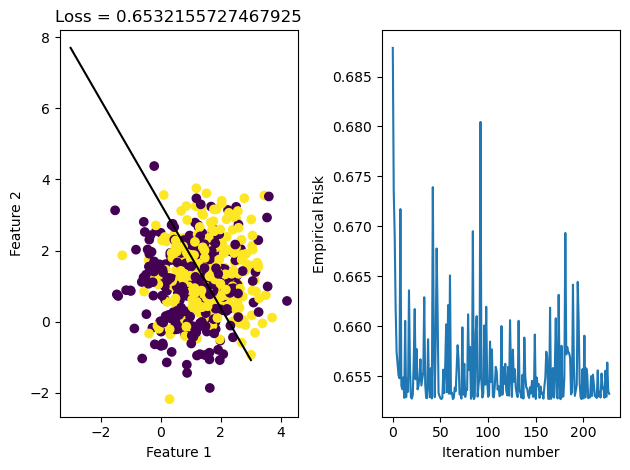

In [117]:
LR.fit_stochastic(X, y, alpha = 0.1, max_epochs = 10000, batch_size = 10, momentum = True)

# inspect the fitted value of w
LR.w 

fig, axarr = plt.subplots(1, 2)

axarr[0].scatter(X[:,0], X[:,1], c = y)
axarr[0].set(xlabel = "Feature 1", ylabel = "Feature 2", title = f"Loss = {LR.loss_history[-1]}")

f1 = np.linspace(-3, 3, 101)

p = axarr[0].plot(f1, (- LR.w[2] - f1*LR.w[0])/LR.w[1], color = "black")

axarr[1].plot(LR.loss_history)
axarr[1].set(xlabel = "Iteration number", ylabel = "Empirical Risk")
plt.tight_layout()